# <center>1) Импорт необходимых библиотек</center>

In [110]:
# Импорт библиотеки pandas для работы с табличными данными.
import pandas as pd
# Импорт библиотеки numpy для работы с массивами и числовыми операциями.
import numpy as np
# Импорт библиотеки seaborn для создания визуализаций данных.
import seaborn as sns 
# Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций.
from matplotlib import pyplot as plt 
# Импорт библиотеки для работы с датой и временем.
from datetime import datetime, date
# Импорт библиотеки preprocessing.
from sklearn import preprocessing 
# Импорт функции для разбиения данных на тренировочную и тестовую выборки
from sklearn.model_selection import train_test_split 
# Импорт модели логистической регрессии.
from sklearn.linear_model import LogisticRegression
# Импорт модели дерева решений.
from sklearn.tree import DecisionTreeClassifier
# Импорт модели случайного леса.
from sklearn.ensemble import RandomForestClassifier
# Импорт модели градиентного бустинга CatBoost.
from catboost import CatBoostClassifier
# Импорт модели решётчатого поиска гиперпараметров.
from sklearn.model_selection import GridSearchCV
# Импорт модуля для работы с метриками оценки моделей.
import sklearn.metrics
# Импорт функции для создания сводки качества классификации.
from sklearn.metrics import classification_report
# Импорт функции для создания матрицы ошибок.
from sklearn.metrics import confusion_matrix
# Уберем предупреждения, чтобы они не загромождали вывод.
import warnings
warnings.filterwarnings('ignore')

# <center>2) Знакомство с данными</center>

In [111]:
# Открываем данные.
project_df = pd.read_csv('data/undefind.csv', sep=';')
project_df

,ID истории болезни,Осн. диаг. при выписке МКБ10 (текст),Заголовок документа,Кол. лаб. показатель,Значение кол. показателя,Ед. изм. кол. показателя,Норма кол. показателя,Флаг нормы кол. показателя,Кач. лаб. показатель,Значение кач. показателя,Норма кач. показателя,Пол,Дата рождения пациента
0,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Лейкоциты (WBC),1.80,10*9/л,4:11,Пониж,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
1,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Эритроциты (RBC),4.18,10*12/л,"3,8:5,7",Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
2,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гемоглобин (HGB),120.00,г/л,117:160,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
3,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Гематокрит (HCT),35.10,%,35:47,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
4,2e1d0b3f-488a-11ed-ab5a-0050568844e6,Плазмоклеточный лейкоз,Общий анализ крови,Средний объем эритроцита (MCV),84.00,фл,80:99,Норм,NaN,NaN,NaN,Ж,1962-09-22 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36292,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Базофилы,1.00,%,0:2,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36293,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Эозинофилы,0.00,%,0:5,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36294,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Пролимфоциты,0.00,%,0:0,Норм,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00
36295,516f652e-8bb8-11eb-bb95-2cea7fe73f75,Острый лейкоз неуточненного клеточного типа,Общий анализ крови,Лимфоциты,65.00,%,18:44,Повыш,Комментарий,Тромбоциты проверены. Рекомендована консультац...,_,М,2014-10-17 00:00:00


In [112]:
# Проверяем на дубликаты.
project_df.duplicated().sum()

4091

In [113]:
# Избавимся от дубликатов.
project_df = project_df.drop_duplicates()
project_df.shape

(32206, 13)

In [114]:
# Посмотрим информацию о признаках.
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32206 entries, 0 to 36296
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID истории болезни                    32206 non-null  object 
 1   Осн. диаг. при выписке МКБ10 (текст)  32206 non-null  object 
 2   Заголовок документа                   32206 non-null  object 
 3   Кол. лаб. показатель                  32155 non-null  object 
 4   Значение кол. показателя              32155 non-null  float64
 5   Ед. изм. кол. показателя              32155 non-null  object 
 6   Норма кол. показателя                 32155 non-null  object 
 7   Флаг нормы кол. показателя            32155 non-null  object 
 8   Кач. лаб. показатель                  6931 non-null   object 
 9   Значение кач. показателя              6931 non-null   object 
 10  Норма кач. показателя                 6931 non-null   object 
 11  Пол                 

In [115]:
# Выведем кол-во пропущенных значений в каждом признаке.
project_df.isna().sum()

ID истории болезни                          0
Осн. диаг. при выписке МКБ10 (текст)        0
Заголовок документа                         0
Кол. лаб. показатель                       51
Значение кол. показателя                   51
Ед. изм. кол. показателя                   51
Норма кол. показателя                      51
Флаг нормы кол. показателя                 51
Кач. лаб. показатель                    25275
Значение кач. показателя                25275
Норма кач. показателя                   25275
Пол                                         0
Дата рождения пациента                      0
dtype: int64

In [116]:
# Подсчитаем кол-во уникальных значений внутри каждого признака.
for col in project_df.columns:
    print(f'Признак: {project_df[col].value_counts(dropna=False)}')
    print('-' * 60)

Признак: ID истории болезни
ffa72572-f065-11ec-ab56-0050568844e6    547
70076ff2-f7da-11ee-ab6f-0050568844e6    495
c1f452ff-d091-11ee-8606-005056880ecb    476
d13aae4f-a605-11ed-ab61-0050568844e6    466
aaf39b25-e684-11ee-ab6f-0050568844e6    429
                                       ... 
b86cafe6-6a6c-11ea-80cd-901b0e633689     26
4dd6bc50-2fe4-11ec-bb98-2cea7fe73f75     25
d13f240e-4d5b-11ea-80c8-901b0e63368a     24
5bcdbef9-efcf-11ed-8604-005056880ecb     23
70f64d47-d5c1-11e9-80bb-901b0e633689      1
Name: count, Length: 243, dtype: int64
------------------------------------------------------------
Признак: Осн. диаг. при выписке МКБ10 (текст)
Другой уточненный лейкоз                       22046
Острый миелоидный лейкоз                        5636
Другой миелоидный лейкоз                        1677
Хронический лимфоцитарный лейкоз                 925
Плазмоклеточный лейкоз                           543
Острый лимфобластный лейкоз                      404
Хронический миелоидный л

In [117]:
# Выведем названия всех признаков в таблице.
project_df.columns

Index(['ID истории болезни', 'Осн. диаг. при выписке МКБ10 (текст)',
       'Заголовок документа', 'Кол. лаб. показатель',
       'Значение кол. показателя', 'Ед. изм. кол. показателя',
       'Норма кол. показателя', 'Флаг нормы кол. показателя',
       'Кач. лаб. показатель', 'Значение кач. показателя',
       'Норма кач. показателя', 'Пол', 'Дата рождения пациента'],
      dtype='object')

**<u>Предварительные выводы по признакам:</u>**

1) `'ID истории болезни'`

    * Значения не полностью уникальны. Присутствуют разные анализы одного и того же пациента.

2) `'Осн. диаг. при выписке МКБ10'`

    * 11 уникальных значений. При этом среди них нет здоровых пациентов.

3) `'Заголовок документа'`

    * Всего одно уникальное значение. Неинформативный признак. Можно будет от него избавиться.

4) `'Кол. лаб. показатель'`

    * Очень большое кол-во уникальных значений. Связано скорее всего с тем, что один и тот же показатель записан по-разному. Потребуется перезаписать значения.

5) `'Значение кол. показателя'`

    * На данном этапе невозможно анализировать эти значения. Возможно, если у одного и того же показателя разные единицы измереня, потребуется перезаписать результаты.

6) `'Ед. изм. кол. показателя'`

    * Уже на этом этапе видно, что одни и те же единицы измереня записаны по-разному. Потребуется предобработка.
    * Есть пропуски.
    
7) `'Норма кол. показателя'`

    * В ходе обсуждения было выяснено, что даже для одного и того же показателя нормы различались. Возможно потребуется предобработка данного признака (заменить его на новые признаки `'нижняя граница нормы'` и `'верхняя граница нормы'`).

8) `'Флаг нормы кол. показателя'`

    * Признак, в котором записан результат сравнения показателя с референcной нормой.
    * Есть пропуски.

9) `'Кач. лаб. показатель'`

    * Преимущественное большинство это пропуски.
    * Непонятно, что обозначает значение *"Комментарий"*.
    * Возможно для нас это будет неинформативный признак.

10) `'Значение кач. показателя'`

    * Много пропусков.
    * Видимо в этом признаке раскрывается тот самый *"Комментарий"*.
    * Возможно для нас это будет неифнормативный признак.

11) `'Норма кач. показателя'`

    * Кол-во пропусков совпадает с кол-вом пропусков в предыдущих двух признаках.
    * Предварительные выводы такие же.

12) `'Пол'`

    * Всего два значения, имеет смысл перекодировать (Ж = 0, М = 1).

13) `'Дата рождения пациента'`

    * В том формате, в котором представлена, тяжело воспринимается. Имеет смысл извлечь возраст пациента и записать в новый признак, а от этого избавиться.

# <center>3) Предварительная обработка и очистка данных</center>

## Признак 'ID истории болезни'

In [118]:
# Присвоим каждому ID и/б своё число.
id_list = list(project_df['ID истории болезни'].unique())
project_df['ID истории болезни'] = project_df['ID истории болезни'].map(lambda x: id_list.index(x))

## Признак 'Заголовок документа'

In [119]:
# Избавимся от признака `Заголовок документа`.
project_df = project_df.drop(labels='Заголовок документа', axis=1)

## Признак 'Кол. лаб. показатель'

In [120]:
# Посмотрим все уникальные значения в признаке `Кол. лаб. показатель`.
project_df['Кол. лаб. показатель'].unique()

array(['Лейкоциты (WBC)', 'Эритроциты (RBC)', 'Гемоглобин (HGB)',
       'Гематокрит (HCT)', 'Средний объем эритроцита (MCV)',
       'Среднее содержание гемоглобина в эритроците (MCH)',
       'Средняя концентрация гемоглобина в эритроците (MCHC)',
       'Тромбоциты (PLT)', 'Нейтрофилы, относительное количество (NE%)',
       'Лимфоциты, относительное количество (LY%)',
       'Нейтрофилы, абсолютное количество (NE#)',
       'Лимфоциты, абсолютное количество (LY#)',
       'Смешанная фракция, абсолютное количество (MXD#)',
       'Смешанная фракция, относительное количество (MXD%)',
       'Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)',
       'Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)',
       'Ширина распределения эритроцитов по объему (RDW)',
       'Тромбокрит (PCT)', 'Средний объем тромбоцита (MPV)',
       'Ширина распределения тромбоцитов (PDW)',
       'Моноциты, относительное количество (MO%)',
       'Эозинофил

In [121]:
# Перезапишем значения, чтобы сократить кол-во уникальных значений.
# Создадим функцию, которая будет проверять значение и перезаписывать его.
def new_name(value: object) -> str:
    """Функция для преобразования похожих значений в столбце 'Кол. лаб. показатель'
    
    Args: 
        значения типа object

    Returns:
       значения типа str
    """
    
    if value in ['Общее количество лейкоцитов (WBC)', 
                 'Лейкоциты (WBC)', 
                 'Лейкоциты']:
        return 'WBC'
    elif value in ['Общее количество эритроцитов (RBC)', 
                   'Эритроциты (RBC)', 
                   'Эритроциты']:
        return 'RBC'
    elif value in ['Гемоглобин (HGB)', 
                   'Гемоглобин']:
        return 'HGB'
    elif value in ['Гематокрит (HCT)', 
                   'Гематокрит']:
        return 'HCT'
    elif value in ['Тромбоциты (PLT)', 
                   'Тромбоциты']:
        return 'PLT'
    elif value in ['Тромбокрит (PCT)', 
                   'Тромбокрит']:
        return 'PCT'
    elif value in ['Ширина распределения эритроцитов (RDW)', 
                   'Ширина распределения эритроцитов', 
                   'Ширина распределения эритроцитов по объему (RDW)']:
        return 'RWD'
    elif value in ['Средний объем эритроцита (MCV)', 
                   'Средний объем эритроцита']:
        return 'MCV'
    elif value in ['Среднее содержание гемоглобина в эритроците (MCH)', 
                   'Среднее содержание гемоглобина в эритроците']:
        return 'MCH'
    elif value in ['Средняя концентрация гемоглобина в эритроците (MCHC)', 
                   'Средняя концентрация гемоглобина в эритроците']:
        return 'MCHC'
    elif value in ['Ширина распределения эритроцитов по объему, стандартное отклонение (RDW-SD)',
                   'Ширина распределения эритроцитов, стандартное отклонение (RDW-SD)',
                   'Ширина распределения эритроцитов по объему, стандартное отклонение']:
        return 'RDW-SD'
    elif value in ['Ширина распределения эритроцитов по объему, коэффициент вариации (RDW-CV)',
                   'Ширина распределения эритроцитов по объему, коэффициент вариации']:
        return 'RDW-CV'
    elif value in ['MPV (Средний объём тромбоцитов)', 
                   'Средний объем тромбоцита (MPV)', 
                   'Средний объём тромбоцитов', 
                   'Средний объем тромбоцита']:
        return 'MPV'
    elif value in ['Ширина распределения тромбоцитов (PDW)', 
                   'Ширина распределения тромбоцитов по объему', 
                   'Ширина распределения тромбоцитов']:
        return 'PDW'
    elif value in ['Ретикулоциты %']:
        return 'RET%'
    elif value in ['Ретикулоциты кол-во']:
        return 'RET#'
    elif value in ['СОЭ Панч', 
                   'Скорость оседания эритроцитов (СОЭ)', 
                   'СОЭ Панч.', 
                   'СОЭ Вест.', 
                   'Скорость оседания эритроцитов (СОЭ) по Вестергрену', 
                   'СОЭ по Панченкову']:
        return 'ESR'
    elif value in ['Цветовой показатель']:
        return 'CI'
    elif value in ['Относительное количество нейтрофилов (NE%)', 
                   'Нейтрофилы, относительное количество (NE%)',
                   'Нейтрофилы, относительное количество', 
                   'Нейтрофилы %']:
        return 'NE%'
    elif value in ['Сегментоядерные']:
        return 'NE%S'
    elif value in ['Юные']:
        return 'NE%YY'
    elif value in ['Палочкоядерные']:
        return 'NE%Y'
    elif value in ['Относительное количество лимфоцитов (LY%)', 
                   'Лимфоциты, относительное количество (LY%)', 
                   'Лимфоциты, относительное количество', 'Лимфоциты %']:
        return 'LY%'
    elif value in ['Относительное количество базофилов (BA%)', 
                   'Базофилы, относительное количество (BA%)', 
                   'Базофилы, относительное количество', 
                   'Базофилы %', 
                   'Базофилы']:
        return 'BA%'
    elif value in ['Относительное количество моноцитов (MO%)', 
                   'Моноциты, относительное количество (MO%)', 
                   'Моноциты, относительное количество', 
                   'Моноциты %']:
        return 'MO%'
    elif value in ['Моноциты']:
        return 'MO'
    elif value in ['Относительное количество эозинофилов (EO%)',
                   'Эозинофилы, относительное количество (EO%)', 
                   'Эозинофилы, относительное количество', 
                   'Эозинофилы %']:
        return 'EO%'
    elif value in ['Эозинофилы']:
        return 'EO'
    elif value in ['Смешанная фракция, относительное количество (MXD%)', 
                   'Смешанная фракция, относительное количество', 
                   'Неклассифицируемые %', 
                   'MXD']:
        return 'MDX%'
    elif value in ['Абсолютное количество нейтрофилов (NE#)', 
                   'Нейтрофилы, абсолютное количество (NE#)', 
                   'Нейтрофилы, абсолютное количество', 
                   'Нейтрофилы #']:
        return 'NE#'
    elif value in ['Абсолютное количество лимфоцитов (LY#)', 
                   'Лимфоциты, абсолютное количество (LY#)', 
                   'Лимфоциты #', 
                   'Лимфоциты, абсолютное количество']:
        return 'LY#'
    elif value in ['Лимфоциты']:
        return 'LY'
    elif value in ['Абсолютное количество базофилов (BA#)', 
                   'Базофилы, абсолютное количество (BA#)', 
                   'Базофилы, абсолютное количество', 
                   'Базофилы #', 
                   'Базофилы # ']:
        return 'BA#'
    elif value in ['Абсолютное количество моноцитов (MO#)', 
                   'Моноциты, абсолютное количество (MO#)', 
                   'Моноциты #', 
                   'Моноциты, абсолютное количество']:
        return 'MO#'
    elif value in ['Абсолютное количество эозинофилов (EO#)', 
                   'Эозинофилы, абсолютное количество (EO#)', 
                   'Эозинофилы, абсолютное количество', 
                   'Эозинофилы # ']:
        return 'EO#'
    elif value in ['Смешанная фракция, абсолютное количество (MXD#)', 
                   'Смешанная фракция, абсолютное количество', 
                   'Неклассифицируемые кол-во', 
                   'MXD# ']:
        return 'MDX#'
    elif value in ['Плазматич. клетки', 
                   'Плазматические клетки', 
                   'Миелоциты', 
                   'Промиелоциты', 
                   'Пролимфоциты', 
                   'Бласты',
                   'Нормобласты', 
                   'Нормобласты #', 
                   'Нормобласты %']:
        return 'Atypical cells'
    else:
        return value

In [122]:
# Применим эту функцию.
project_df['Кол. лаб. показатель'] = project_df['Кол. лаб. показатель'].apply(new_name)

In [123]:
# Посмотрим, что получилось после обработки.
project_df['Кол. лаб. показатель'].value_counts(dropna=False)

Кол. лаб. показатель
RBC               1594
PLT               1553
HGB               1517
WBC               1512
MCHC              1489
HCT               1451
LY%               1447
NE%               1310
MCV               1267
LY#               1264
NE#               1247
MCH               1075
BA%               1061
MO%                803
PCT                760
EO%                748
ESR                738
MO#                721
LY                 719
CI                 716
NE%S               715
MPV                695
MO                 666
Atypical cells     663
MDX%               646
BA#                640
EO#                619
PDW                600
NE%Y               575
EO                 533
RDW-SD             513
RWD                413
MDX#               395
RDW-CV             326
RDW                295
NE%YY              276
MPV                139
MXD#                96
RDW-CV              90
MXD%                89
P-LCR               78
RET%                57
NaN          

In [124]:
# # Посмотрим на 51 пациента с пропусками в данном признаке.
# project_df[project_df[['Кол. лаб. показатель']].isna().all(axis=1)]

У всех пациентов с пропуском в признаке `'Кол. лаб. показатель'` отсутствуют значения в других важных признаках, на основе которых можно было бы предложить, что это за показатель. Заполнить эти пропуски мы не сможем, поэтому имеет смысл избавиться от данных строчек.

In [125]:
# Удаляем строки с пропусками в 'Кол. лаб. показатель'.
project_df = project_df.dropna(subset = ['Кол. лаб. показатель'])
project_df.shape

(32155, 12)

## Признак 'Ед. изм. кол. показателя'

In [126]:
# Напишем функцию, которая заменяет различные варианты написания 'фл'.
def new_units(value: object) -> str:
    """Функция для преобразования похожих значений в столбце 'Ед. изм. кол. показателя'
    
    Args: 
        значения типа object

    Returns:
       значения типа str
    """
    
    if value in ['fL', 'FL']:
        return 'фл'
    else:
        return value

In [127]:
# Применим эту функцию.
project_df['Ед. изм. кол. показателя'] = project_df['Ед. изм. кол. показателя'].apply(new_units)

In [128]:
# Посмотрим, что получилось после обработки.
project_df['Ед. изм. кол. показателя'].value_counts(dropna=False)

Ед. изм. кол. показателя
%          13627
10*9/л      8070
фл          3122
г/л         2384
10*12/л     1594
пг          1075
_            918
мм/час       738
г/дл         627
Name: count, dtype: int64

In [129]:
# Проверим одинаковые ли системы измерения у одного и того же показателя.
units_of_measurement = project_df.groupby('Кол. лаб. показатель')['Ед. изм. кол. показателя'].nunique().sort_values()
units_of_measurement[units_of_measurement > 1]

Кол. лаб. показатель
MPV               2
MXD#              2
MCHC              2
PDW               3
Atypical cells    3
Name: Ед. изм. кол. показателя, dtype: int64

In [130]:
# Выведем различия в измерениях для каждого значения.
check_units = project_df[project_df['Кол. лаб. показатель'].isin(units_of_measurement[units_of_measurement > 1].index)]
check_units.groupby('Кол. лаб. показатель')['Ед. изм. кол. показателя'].value_counts()

Кол. лаб. показатель  Ед. изм. кол. показателя
Atypical cells        %                           487
                      _                           164
                      10*9/л                       12
MCHC                  г/л                         862
                      г/дл                        627
MPV                   фл                          690
                      _                             5
MXD#                  10*9/л                       63
                      _                            33
PDW                   фл                          513
                      %                            82
                      г/л                           5
Name: count, dtype: int64

1) `'Atypical cells'`: совершенно разные системы измерения, нужно будет определиться с какой будем дальше работать, т.к. вручную мы это никак не преобразуем.

2) `'MCHC'`: децилитры перевести в литры мы сможем.

3) `'MPV'`: всегда измеряется в фемтолитрах (фл). Нужно проверить 5 показателей со значением измерения `'_'`.

4) `'MXD#'`: нужно проверить 33 показателя со значением измереня `'_'`, скорее всего это та же система измереня.

5) `'PDW'`: совершенно разные системы измерения, нужно будет определиться с какой будем дальше работать, т.к. вручную мы это никак не преобразуем.

In [131]:
# У 12 пациентов с 'Atypical cells' и 'Ед. изм. кол. показателя' = '10*9/л', результат = 0.
# Поэтому их можно преобразовать в любую другую систему измерения.
# Изменим данные этих пациентов под преобладающую систему измерения.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '10*9/л'), 'Норма кол. показателя'] = '0:0'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'Atypical cells')&(project_df['Ед. изм. кол. показателя'] == '10*9/л'), 'Ед. изм. кол. показателя'] = '%'

In [132]:
# Преобразованиями для 'MCHC'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Норма кол. показателя'] = '300:380'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Значение кол. показателя'] = project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Значение кол. показателя'] * 0.1
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MCHC')&(project_df['Ед. изм. кол. показателя'] == 'г/дл'), 'Ед. изм. кол. показателя'] = 'г/л'

In [133]:
# Преобразования для 'MPV'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Норма кол. показателя'] = '6,5:12,6'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MPV')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Ед. изм. кол. показателя'] = 'фл'

In [134]:
# Преобразования для 'MXD#'.
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')&(project_df['Значение кол. показателя'] > 0.8), 'Флаг нормы кол. показателя'] = 'Повыш'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_')&(project_df['Значение кол. показателя'] < 0.2), 'Флаг нормы кол. показателя'] = 'Пониж'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Норма кол. показателя'] = '0,2:0,8'
project_df.loc[(project_df['Кол. лаб. показатель'] == 'MXD#')&(project_df['Ед. изм. кол. показателя'] == '_'), 'Ед. изм. кол. показателя'] = '10*9/л'

## Признак 'Норма кол. показателя'

In [135]:
# Проверяем нормы для различных показателей.
norms_of_values = project_df.groupby('Кол. лаб. показатель')['Норма кол. показателя'].nunique()
check_norms = project_df[project_df['Кол. лаб. показатель'].isin(norms_of_values[norms_of_values > 1].index)]
all_norms = check_norms.groupby(['Кол. лаб. показатель'])['Норма кол. показателя'].value_counts()
all_norms

Кол. лаб. показатель  Норма кол. показателя
Atypical cells        0:0                       477
                      0:2                       126
                      0:1                        48
                      _                          12
BA#                   0:0,1                     622
                                               ... 
RWD                   10,5:18,0                   3
WBC                   4:11                     1429
                      4.0:8.8                    41
                      4,00:11,00                 23
                      4:8,8                      19
Name: count, Length: 131, dtype: int64

In [136]:
all_norms.index.values

array([('Atypical cells', '0:0'), ('Atypical cells', '0:2'),
       ('Atypical cells', '0:1'), ('Atypical cells', '_'),
       ('BA#', '0:0,1'), ('BA#', '0,00:0,10'), ('BA#', '0:0.1'),
       ('BA%', '0:2'), ('BA%', '0,0:2,0'), ('CI', '0,8:1,05'),
       ('CI', '0,85:1,15'), ('CI', '_'), ('CI', '0,8:1,5'),
       ('CI', '0.8:1.05'), ('CI', '0,80:1,05'), ('CI', '0.80:1.05'),
       ('EO#', '0:0,4'), ('EO#', '0,00:0,40'), ('EO%', '0:5'),
       ('EO%', '0,0:5,0'), ('ESR', '2:20'), ('ESR', 'Общая норма'),
       ('ESR', '1:20'), ('ESR', '2:15'), ('HCT', '35:47'),
       ('HCT', '39:52'), ('HCT', '35:52'), ('HCT', '34:46'),
       ('HCT', '30.0:49.5'), ('HCT', '35,0:47,0'), ('HCT', '39,0:52,0'),
       ('HGB', '117:160'), ('HGB', '132:180'), ('HGB', '117:180'),
       ('HGB', '117:140'), ('HGB', '114:154'), ('HGB', '132:160'),
       ('HGB', '122:168'), ('LY#', '1:3,7'), ('LY#', '_'),
       ('LY#', '1,00:3,70'), ('LY#', '1,00:3.70'), ('LY#', '1,0:3,7'),
       ('LY%', '18:44'), ('LY%', '2

## Признак 'Флаг нормы кол. показателя'

In [137]:
# Посмотрим значения.
project_df['Флаг нормы кол. показателя'].value_counts(dropna=False)

Флаг нормы кол. показателя
Норм     18497
Пониж     7214
Повыш     6381
Норма       63
Name: count, dtype: int64

In [138]:
# Заменим значения.
project_df['Флаг нормы кол. показателя'].replace('Норм', 'Норма', inplace=True)

## Признаки 'Кач. лаб. показатель', 'Значение кач. показателя', 'Норма кач. показателя'

Т.к. преимущественное большинство значений в данных признаках пропуски, а оставшиеся значения носят индивидуальный характер (пояснения к конкретному анализу), данные признаки неинформативны.

In [139]:
# Избавимся от данных признаков.
project_df = project_df.drop(labels='Кач. лаб. показатель', axis=1)
project_df = project_df.drop(labels='Значение кач. показателя', axis=1)
project_df = project_df.drop(labels='Норма кач. показателя', axis=1)

## Признак 'Пол'

In [140]:
# Изменим значения в данном столбце.
project_df['Пол'] = project_df['Пол'].map({'Ж': 0, 'М': 1})

## Признак 'Дата рождения пациента'

In [141]:
# Преобразование признака в формат даты.
project_df['Дата рождения пациента'] = pd.to_datetime(project_df['Дата рождения пациента'])

In [142]:
# Функция для высчитывания возраста.
def age(date_of_born: object) -> int: 
    """Функция для извлечения возраста пациента из столбца 'Дата рождения пациента'
    
    Args: 
        значения типа object

    Returns:
       значения типа int
    """
    
    today = date.today() 
    return today.year - date_of_born.year - ((today.month, today.day) < (date_of_born.month, date_of_born.day))

In [143]:
# Применим функцию.
project_df['Возраст'] = project_df['Дата рождения пациента'].apply(age)

In [144]:
# Удалим столбец 'Дата рождения пациента'.
project_df = project_df.drop(labels='Дата рождения пациента', axis=1)

In [145]:
# Переименуем столбцы для удобства.
project_df.rename(columns={
    'ID истории болезни': 'ID пациента',
    'Осн. диаг. при выписке МКБ10 (текст)': 'Диагноз',
    'Кол. лаб. показатель': 'Лабораторный показатель',
    'Значение кол. показателя': 'Значение',
    'Ед. изм. кол. показателя': 'Единицы измерения',
    'Норма кол. показателя': 'Референсный интервал',
    'Флаг нормы кол. показателя': 'Результат'
    },
    inplace=True
)

In [146]:
# Результат преобразований.
project_df

,ID пациента,Диагноз,Лабораторный показатель,Значение,Единицы измерения,Референсный интервал,Результат,Пол,Возраст
0,0,Плазмоклеточный лейкоз,WBC,1.80,10*9/л,4:11,Пониж,0,62
1,0,Плазмоклеточный лейкоз,RBC,4.18,10*12/л,"3,8:5,7",Норма,0,62
2,0,Плазмоклеточный лейкоз,HGB,120.00,г/л,117:160,Норма,0,62
3,0,Плазмоклеточный лейкоз,HCT,35.10,%,35:47,Норма,0,62
4,0,Плазмоклеточный лейкоз,MCV,84.00,фл,80:99,Норма,0,62
...,...,...,...,...,...,...,...,...,...
36292,242,Острый лейкоз неуточненного клеточного типа,BA%,1.00,%,0:2,Норма,1,10
36293,242,Острый лейкоз неуточненного клеточного типа,EO,0.00,%,0:5,Норма,1,10
36294,242,Острый лейкоз неуточненного клеточного типа,Atypical cells,0.00,%,0:0,Норма,1,10
36295,242,Острый лейкоз неуточненного клеточного типа,LY,65.00,%,18:44,Повыш,1,10


In [147]:
# Посмотрим информацию о признаках.
project_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32155 entries, 0 to 36296
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID пациента              32155 non-null  int64  
 1   Диагноз                  32155 non-null  object 
 2   Лабораторный показатель  32155 non-null  object 
 3   Значение                 32155 non-null  float64
 4   Единицы измерения        32155 non-null  object 
 5   Референсный интервал     32155 non-null  object 
 6   Результат                32155 non-null  object 
 7   Пол                      32155 non-null  int64  
 8   Возраст                  32155 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 2.5+ MB


In [148]:
# Выведем кол-во пропущенных значений в каждом признаке.
project_df.isna().sum()

ID пациента                0
Диагноз                    0
Лабораторный показатель    0
Значение                   0
Единицы измерения          0
Референсный интервал       0
Результат                  0
Пол                        0
Возраст                    0
dtype: int64

Было решено выбрать таргетом признак `'Результат'`. В связи с чем:

1) Признак `'ID пациента'` не несёт никакой информации и будет лучше его удалить.

2) Признак `'Диагноз'` будет вносить шум. Т.к. 100% пациентов в таблице с тем или иным диагнозом лейкоза (здоровых нет), несмотря на результаты анализа, т.е. этот диагноз закреплён на ID пациента и остаётся за ним, даже если по анализам у пациента ремиссия, для нас он неинформативен. Также будет удалён.

3) Признак `'Референсный интервал'` лучше разделить на 2 новых признака: `'Верхняя граница`' и `'Нижняя граница'`, а от самого признака избавиться.

4) Обновить информацию в признаке `'Результат'`, т.к. в таблице встречались ошибки, путём сравнения `'Значение'` c 2 новыми признаками (`'Верхняя граница`' и `'Нижняя граница'`) и получить 2 значения в данном признаке: 'Норма' = 0, 'Отклонение' = 1.

In [149]:
# 1) Удаляем 2 неинформативных признака.
project_df = project_df.drop(labels='ID пациента', axis=1)
project_df = project_df.drop(labels='Диагноз', axis=1)

In [150]:
# Проверим уникальные значения в признаке 'Референсный интервал'.
project_df['Референсный интервал'].unique()

array(['4:11', '3,8:5,7', '117:160', '35:47', '80:99', '27:38', '300:380',
       '150:450', '45:72', '18:44', '1,5:7', '1:3,7', '0,2:0,8', '5:10',
       '10,5:18', '37:54', '0,19:0,36', '9,1:12,6', '9,3:16,7', '2:12',
       '0:5', '0:2', '0,1:0,7', '0:0,4', '0:0,1', '0,8:1,05', '2:20',
       '1:6', '0:0', '6,5:10', '9:17', '4,3:6,1', '132:180', '39:52',
       '10:18', '6,5:12,6', '0,2:2', '17:70', '0,85:1,15', '0:4', '2:10',
       '4,30:6,10', '4,00:11,00', '45,0:72,0', '18,0:44,0 ', '1,50:7,00',
       '1,00:3,70', '0.2:0.8', '_', '0,10:0,70', '0,00:0,40', '0,00:0,10',
       '18,0:44,0', '2,0:12,0', '0,0:5,0', '0,0:2,0', '3,8:6,1',
       '117:180', '35:52', '0:0,7', '0:1', '1:20', '2,0:12,0 ',
       '1,00:3.70', '0,2:2,0', '117:140', '4.0:8.8', '3.5:5.2', '114:154',
       '34:46', '26.5:35.5', '32.2:35.6', '150:320', '41:75', '20:45',
       '7.5:10.0', '15.0:17.0', '3:8', '10.7:45', '4:8,8', '3,5:5,2',
       '26,5:35,5', '32,2:35,6', '7,5:10', '15:17', '10,7:45',
       '0

In [151]:
project_df[project_df['Референсный интервал'] == '_'].shape

(121, 7)

In [152]:
project_df[project_df['Референсный интервал'] == 'Общая норма'].shape

(105, 7)

Просмотрев все нормы для разных лабораторных показателей (строка: [121]; код: `all_norms.index.values`), можно сделать вывод, что референсные интервалы одинаковые для всех пациентов только для 2 лабораторных показателей (`'LY#'`, `'NE#'`). В остальных случаях есть несколько интервалов. Как известно, они зависят не только от пола и возраста, но и от аппарата, на котором проводились измерения. А так как мы работаем с медицинскими данными, то ошибок быть не должно. Применять моду для замены значений будет неправильно, следовательно, их нужно удалить.

In [153]:
# Заменяем значения, где можем.
project_df.loc[(project_df['Лабораторный показатель'] == 'LY#')&(project_df['Референсный интервал'] == '_'), 'Референсный интервал'] = '1:3.7'
project_df.loc[(project_df['Лабораторный показатель'] == 'NE#')&(project_df['Референсный интервал'] == '_'), 'Референсный интервал'] = '1.5:7'

In [154]:
# Удаляем неправильные референсыные интервалы.
project_df.drop(project_df.index[project_df['Референсный интервал'] == '_'], inplace=True)
project_df.drop(project_df.index[project_df['Референсный интервал'] == 'Общая норма'], inplace=True)

In [155]:
# Посмотрим, сколько наблюдений было удалено.
project_df.shape

(32007, 7)

In [156]:
# 2) Разделяем 'Референсный интервал'.
project_df[['Нижняя граница', 'Верхняя граница']] = project_df['Референсный интервал'].str.split(':', expand=True)

project_df['Нижняя граница'] = project_df['Нижняя граница'].str.replace(',', '.')
project_df['Верхняя граница'] = project_df['Верхняя граница'].str.replace(',', '.')

project_df['Нижняя граница'] = project_df['Нижняя граница'].astype(float)
project_df['Верхняя граница'] = project_df['Верхняя граница'].astype(float)

project_df = project_df.drop(labels='Референсный интервал', axis=1)

In [157]:
# Изменим порядок столбцов, для удобства восприятия.
project_df = project_df[['Пол', 'Возраст', 'Лабораторный показатель', 'Значение', 'Единицы измерения', 'Нижняя граница', 'Верхняя граница', 'Результат']]
# Изменим индексы на новые.
project_df.reset_index(drop=True, inplace=True)

In [158]:
# Проверим исходное кол-во пациентов в группах.
project_df['Результат'].value_counts()

Результат
Норма    18412
Пониж     7214
Повыш     6381
Name: count, dtype: int64

In [159]:
# Преобразуем таргетный столбец.
project_df['Результат'] = 0
project_df.loc[(project_df['Значение'] < project_df['Нижняя граница']) | (project_df['Значение'] > project_df['Верхняя граница']), 'Результат'] = 1

In [160]:
# Посмотрим, как изменились группы.
project_df['Результат'].value_counts()

Результат
0    17804
1    14203
Name: count, dtype: int64

In [161]:
# Конечный вид датасета.
project_df

,Пол,Возраст,Лабораторный показатель,Значение,Единицы измерения,Нижняя граница,Верхняя граница,Результат
0,0,62,WBC,1.80,10*9/л,4.0,11.0,1
1,0,62,RBC,4.18,10*12/л,3.8,5.7,0
2,0,62,HGB,120.00,г/л,117.0,160.0,0
3,0,62,HCT,35.10,%,35.0,47.0,0
4,0,62,MCV,84.00,фл,80.0,99.0,0
...,...,...,...,...,...,...,...,...
32002,1,10,BA%,1.00,%,0.0,2.0,0
32003,1,10,EO,0.00,%,0.0,5.0,0
32004,1,10,Atypical cells,0.00,%,0.0,0.0,0
32005,1,10,LY,65.00,%,18.0,44.0,1


In [162]:
# Посмотрим информацию о признаках, после преобразований.
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32007 entries, 0 to 32006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Пол                      32007 non-null  int64  
 1   Возраст                  32007 non-null  int64  
 2   Лабораторный показатель  32007 non-null  object 
 3   Значение                 32007 non-null  float64
 4   Единицы измерения        32007 non-null  object 
 5   Нижняя граница           32007 non-null  float64
 6   Верхняя граница          32007 non-null  float64
 7   Результат                32007 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 2.0+ MB


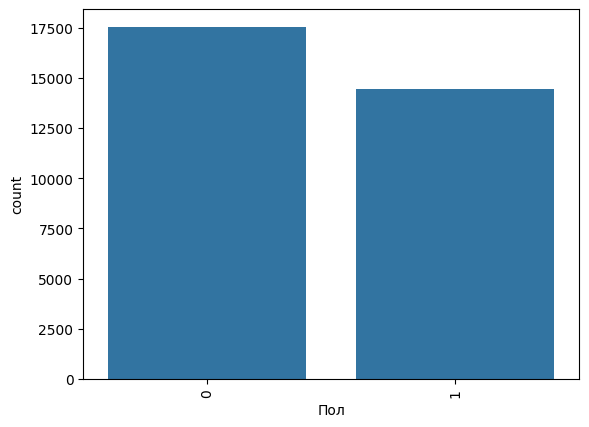

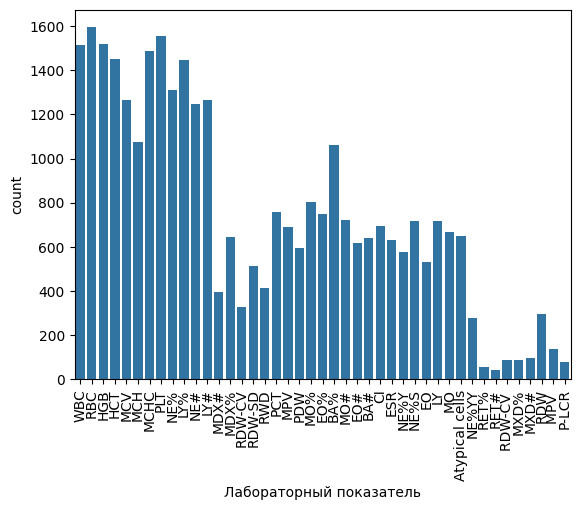

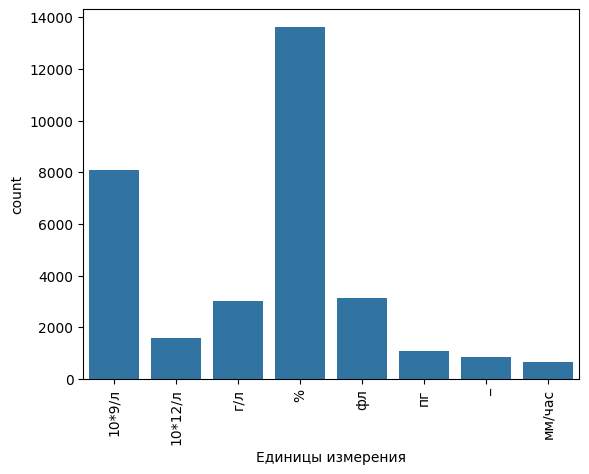

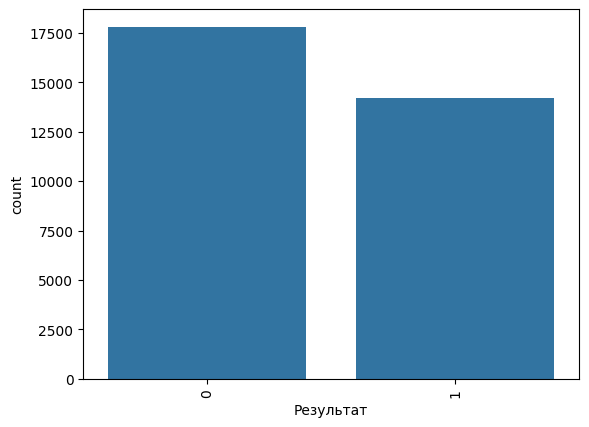

In [163]:
# Countplots для категориальных столбцов.
cat_cols = ['Пол', 'Лабораторный показатель', 'Единицы измерения', 'Результат']
for i in cat_cols:
    sns.countplot(data=project_df, x = i)
    plt.xticks(rotation=90)
    plt.show()

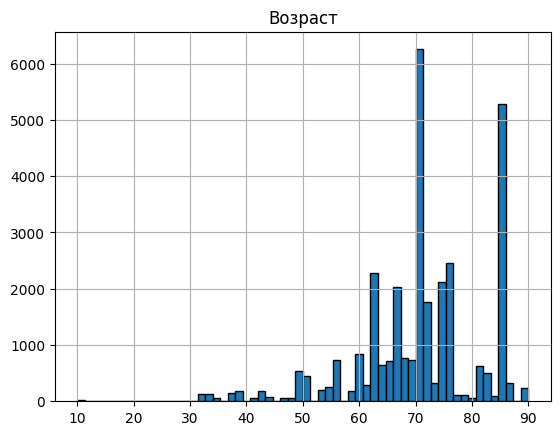

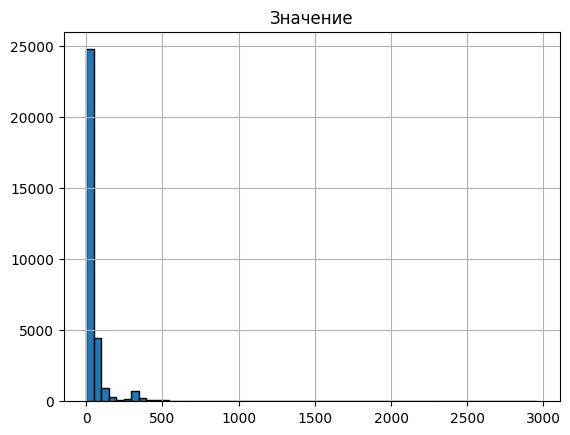

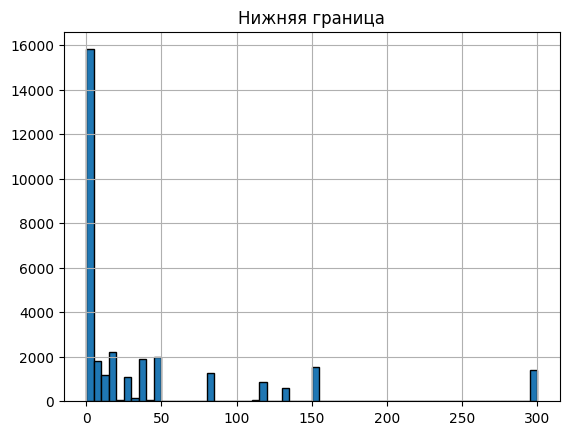

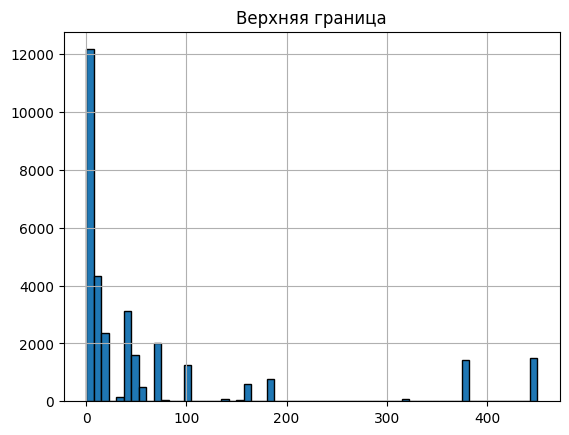

In [164]:
# Гистограммы для числовых столбцов.
num_cols = ['Возраст', 'Значение', 'Нижняя граница', 'Верхняя граница']
for i in num_cols:
    plt.hist(project_df[i], bins = 60, edgecolor = 'black')
    plt.title(i)
    plt.grid()
    plt.show()

# <center>4) Обработка мультиколлирнеарности</center>

In [165]:
# Создаём LabelEncoder и перекодируем признаки типа object.
label_encoder = preprocessing.LabelEncoder()
project_df['Лабораторный показатель'] = label_encoder.fit_transform(project_df['Лабораторный показатель']) 
project_df['Единицы измерения'] = label_encoder.fit_transform(project_df['Единицы измерения']) 

In [166]:
# Посмотрим корреляционные зависимости между признаками.
project_df.corr().round(2)

,Пол,Возраст,Лабораторный показатель,Значение,Единицы измерения,Нижняя граница,Верхняя граница,Результат
Пол,1.00,-0.23,-0.01,0.00,-0.02,0.02,0.02,-0.02
Возраст,-0.23,1.00,0.02,-0.02,0.02,0.01,0.01,0.07
Лабораторный показатель,-0.01,0.02,1.00,0.10,-0.02,-0.02,0.10,0.08
Значение,0.00,-0.02,0.10,1.00,0.16,0.56,0.66,0.02
Единицы измерения,-0.02,0.02,-0.02,0.16,1.00,0.31,0.22,-0.11
Нижняя граница,0.02,0.01,-0.02,0.56,0.31,1.00,0.90,0.11
Верхняя граница,0.02,0.01,0.10,0.66,0.22,0.90,1.00,0.13
Результат,-0.02,0.07,0.08,0.02,-0.11,0.11,0.13,1.00


''

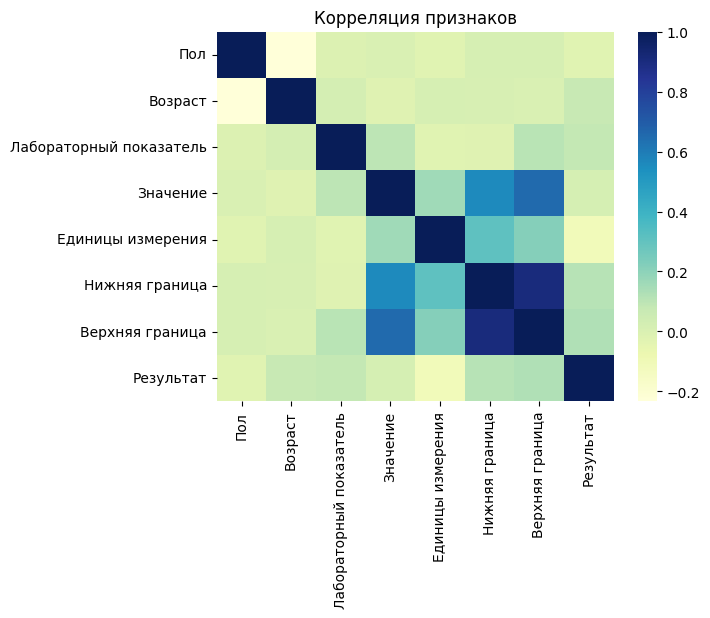

In [167]:
# Визуализируем эту таблицу.
heatmap = sns.heatmap(data=project_df.corr(), cmap='YlGnBu')
heatmap.set_title('Корреляция признаков')
;

In [168]:
# Посмотрим признаки, у которых корреляция по абсолютной величине > 0.8.
corr = project_df.corr(numeric_only=True).round(3)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,Нижняя граница,Верхняя граница
Нижняя граница,1.000,0.904
Верхняя граница,0.904,1.000


In [169]:
# Избавимся от этих признаков.
project_df = project_df.drop(labels='Нижняя граница', axis=1)
project_df = project_df.drop(labels='Верхняя граница', axis=1)

# <center>5) Разделение данных на тренировочную и валидационную выборки</center>

In [170]:
# Выделим целевой признак в отдельную переменную.
y = project_df['Результат']
X = project_df.drop('Результат', axis=1)

In [171]:
# Разобьём выборку на обучающую и тестовую.
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42,
    shuffle=True
)

In [172]:
# Размерности выборок.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22404, 5), (9603, 5), (22404,), (9603,))

In [173]:
# Посмотрим на соотношение классов в тестовой выборке.
y_test.value_counts(normalize=True).round(3)

Результат
0    0.557
1    0.443
Name: proportion, dtype: float64

# <center>6) Настройка гиперпараметров для моделей машинного обучения</center>

In [ ]:
# Настройка гиперпараметров моделей.
model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial']
        }
    },
    
    'Decision_Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [4, 5, 6, 7, 8, 9, 10], 
            'min_samples_split': [3, 4, 5, 10] 
        }
    },
    
    'Random_Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'max_features': ['sqrt', 'log2'],
            'max_depth': [4, 5, 6, 7, 8],
            'criterion': ['gini', 'entropy']
        }
    },
    
    'Cat_Boost': {
        'model': CatBoostClassifier(random_state=42),
        'params': {
            'iterations': [100, 200, 300],
            'depth': [6, 8, 10],
            'learning_rate': [0.1, 0.05, 0.01],
            'logging_level': 'Silent'
        }
    }
}

In [175]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

0:	learn: 0.6759411	total: 1.86ms	remaining: 184ms
1:	learn: 0.6626187	total: 3.48ms	remaining: 171ms
2:	learn: 0.6427824	total: 5.1ms	remaining: 165ms
3:	learn: 0.6267078	total: 6.75ms	remaining: 162ms
4:	learn: 0.6150167	total: 8.46ms	remaining: 161ms
5:	learn: 0.5982383	total: 10.3ms	remaining: 162ms
6:	learn: 0.5881449	total: 11.9ms	remaining: 159ms
7:	learn: 0.5784600	total: 13.6ms	remaining: 157ms
8:	learn: 0.5697899	total: 15.3ms	remaining: 155ms
9:	learn: 0.5617118	total: 17ms	remaining: 153ms
10:	learn: 0.5540263	total: 18.7ms	remaining: 151ms
11:	learn: 0.5483455	total: 20.4ms	remaining: 149ms
12:	learn: 0.5442469	total: 22ms	remaining: 147ms
13:	learn: 0.5357829	total: 23.7ms	remaining: 145ms
14:	learn: 0.5309424	total: 25.3ms	remaining: 144ms
15:	learn: 0.5240878	total: 27.1ms	remaining: 142ms
16:	learn: 0.5176069	total: 28.9ms	remaining: 141ms
17:	learn: 0.5123504	total: 30.6ms	remaining: 140ms
18:	learn: 0.5073855	total: 32.3ms	remaining: 138ms
19:	learn: 0.5013886	total:

In [176]:
# Сохраняем результаты.
best_results = pd.DataFrame(scores, columns=['model','best_score','best_params'])
best_results

,model,best_score,best_params
0,Logistic_Regression,0.582173,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
1,Decision_Tree,0.903544,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
2,Random_Forest,0.899259,"{'criterion': 'entropy', 'max_depth': 8, 'max_..."
3,Cat_Boost,0.981521,"{'depth': 10, 'iterations': 300, 'learning_rat..."


# <center>7) Обучение моделей</center>

## Logistic Regression

In [177]:
# Выбираем наилучшие параметры для логистической регрессии.
best_results.best_params[0]

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [178]:
# Создаём модель.
lg_model = LogisticRegression(solver = 'newton-cg',
                              penalty = 'l2',
                              multi_class = 'auto',
                              random_state = 42)
lg_model.fit(X_train, y_train)
lg_y_predict = lg_model.predict(X_test)

In [179]:
# Оценка нашей модели.
print('\n-- Logistic Regression --')
f1_score = sklearn.metrics.f1_score(y_test, lg_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, lg_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, lg_y_predict))
print('')


-- Logistic Regression --
F1-score: 0.41
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.79      0.68      5352
           1       0.55      0.33      0.41      4251

    accuracy                           0.58      9603
   macro avg       0.57      0.56      0.54      9603
weighted avg       0.57      0.58      0.56      9603

Confusion Matrix:
[[4204 1148]
 [2866 1385]]



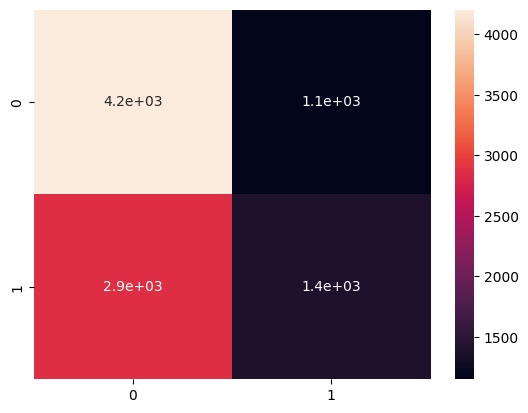

In [180]:
# Построим confusion matrix.
sns.heatmap(confusion_matrix(y_test, lg_y_predict), annot = True)
plt.show()

## Decision Tree

In [181]:
# Выбираем наилучшие параметры для дерева решений.
best_results.best_params[1]

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}

In [182]:
# Создаём модель.
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  max_depth = 10, 
                                  min_samples_split = 5,
                                  random_state = 42)
dt_model.fit(X_train, y_train)
dt_y_predict = dt_model.predict(X_test)

In [183]:
# Оценка нашей модели.
print('\n-- Decision Tree --')
f1_score = sklearn.metrics.f1_score(y_test, dt_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, dt_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, dt_y_predict))
print('')


-- Decision Tree --
F1-score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      5352
           1       0.91      0.87      0.89      4251

    accuracy                           0.91      9603
   macro avg       0.91      0.90      0.91      9603
weighted avg       0.91      0.91      0.91      9603

Confusion Matrix:
[[5000  352]
 [ 535 3716]]



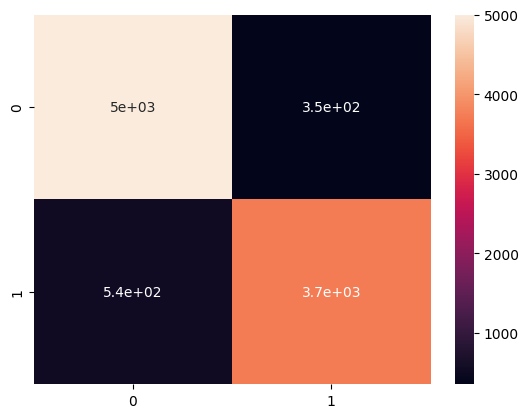

In [184]:
# Построим confusion matrix.
sns.heatmap(confusion_matrix(y_test, dt_y_predict), annot = True)
plt.show()

## Random Forest

In [185]:
# Выбираем наилучшие параметры для случайного леса.
best_results.best_params[2]

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [186]:
# Создаём модель.
rf_model = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 8, 
                                  max_features = 'sqrt',
                                  random_state = 42)
rf_model.fit(X_train, y_train)
rf_y_predict = rf_model.predict(X_test)

In [187]:
# Оценка нашей модели.
print('\n-- Random Forest --')
f1_score = sklearn.metrics.f1_score(y_test, rf_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, rf_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, rf_y_predict))
print('')


-- Random Forest --
F1-score: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      5352
           1       0.95      0.78      0.86      4251

    accuracy                           0.89      9603
   macro avg       0.90      0.88      0.88      9603
weighted avg       0.90      0.89      0.89      9603

Confusion Matrix:
[[5186  166]
 [ 920 3331]]



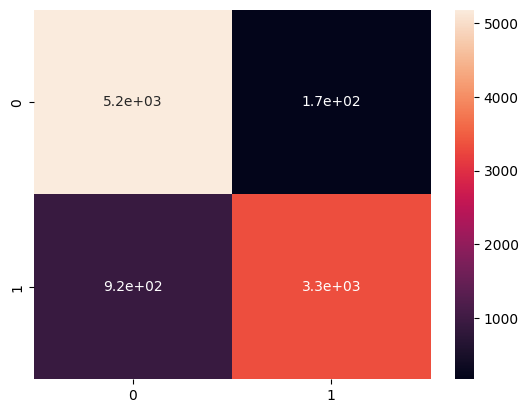

In [188]:
# Построим confusion matrix.
sns.heatmap(confusion_matrix(y_test, rf_y_predict), annot = True)
plt.show()

## Cat Boost

In [189]:
# Выбираем наилучшие параметры для модели CatBoost.
best_results.best_params[3]

{'depth': 10, 'iterations': 300, 'learning_rate': 0.1}

In [ ]:
# Создаём модель.
cb_model = CatBoostClassifier(depth = 10,
                              iterations = 300, 
                              learning_rate = 0.1,
                              logging_level = 'Silent',
                              random_state = 42)
cb_model.fit(X_train, y_train)
cb_y_predict = cb_model.predict(X_test)

0:	learn: 0.6429430	total: 18.5ms	remaining: 5.54s
1:	learn: 0.5915949	total: 34.4ms	remaining: 5.13s
2:	learn: 0.5459527	total: 51.6ms	remaining: 5.11s
3:	learn: 0.5081786	total: 67.5ms	remaining: 4.99s
4:	learn: 0.4776734	total: 83.9ms	remaining: 4.95s
5:	learn: 0.4601878	total: 102ms	remaining: 4.98s
6:	learn: 0.4319594	total: 119ms	remaining: 5s
7:	learn: 0.4167752	total: 136ms	remaining: 4.96s
8:	learn: 0.3983366	total: 153ms	remaining: 4.94s
9:	learn: 0.3861302	total: 169ms	remaining: 4.89s
10:	learn: 0.3659378	total: 186ms	remaining: 4.88s
11:	learn: 0.3547050	total: 202ms	remaining: 4.84s
12:	learn: 0.3426001	total: 219ms	remaining: 4.84s
13:	learn: 0.3281146	total: 235ms	remaining: 4.79s
14:	learn: 0.3105038	total: 251ms	remaining: 4.78s
15:	learn: 0.3034501	total: 267ms	remaining: 4.74s
16:	learn: 0.2881435	total: 283ms	remaining: 4.71s
17:	learn: 0.2745654	total: 298ms	remaining: 4.67s
18:	learn: 0.2694697	total: 313ms	remaining: 4.63s
19:	learn: 0.2593837	total: 328ms	remai

In [191]:
# Оценка нашей модели.
print('\n-- Cat Boost --')
f1_score = sklearn.metrics.f1_score(y_test, cb_y_predict)
print('F1-score: {0:.2f}'.format(f1_score))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, cb_y_predict))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(y_test, cb_y_predict))
print('')


-- Cat Boost --
F1-score: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5352
           1       0.99      0.97      0.98      4251

    accuracy                           0.98      9603
   macro avg       0.98      0.98      0.98      9603
weighted avg       0.98      0.98      0.98      9603

Confusion Matrix:
[[5295   57]
 [ 117 4134]]



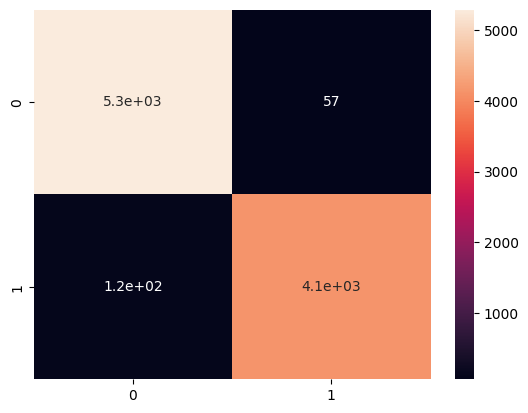

In [192]:
# Построим confusion matrix.
sns.heatmap(confusion_matrix(y_test, cb_y_predict), annot = True)
plt.show()

# <center>8) Сравнение результатов</center>

* **Logistic Regression** F1-score: 0.41
* **Decision Tree** F1-score: 0.89
* **Random Forest** F1-score: 0.86
* **Cat Boost** F1-score: 0.98

<u>Итог:</u>

Наилучшая метрика F1-score была получена у **CatBoost**.

# <center>9) Реализация "срочности"</center>

In [193]:
# Получим предсказания нашей машины, а именно вероятность принадледности к классу 1 (отклонение).
predict = cb_model.predict_proba(X_test)
predict

array([[9.93713281e-01, 6.28671900e-03],
       [9.95206089e-01, 4.79391065e-03],
       [9.99154050e-01, 8.45949644e-04],
       ...,
       [9.80457616e-01, 1.95423843e-02],
       [9.92534977e-01, 7.46502346e-03],
       [2.98491263e-03, 9.97015087e-01]])

In [194]:
# Функция комментирующая полученное предсказание.
def comment(probability: int) -> str:
    """Функция для определения срочности обращения к врачу на основании предсказания модели DecisionTree
    
    Args: 
        вероятность принадлежности объекта к классу 1 (отклонение от нормы)

    Returns:
       срочность необходимости обращения к врачу
    """
    
    if probability > 0.75:
        return "Срочно обратитесь к врачу, который назначил вам этот анализ!"
    elif (probability >= 0.5) and (probability <= 0.75):
        return "Рекомендуем посетить врача, который назначил вам этот анализ, в ближайшее время."
    else:
        return "Результат в пределах референсной нормы. Посетите врача с целью получения заключения."

In [195]:
# Добавим комментарий к результатам тестовой выборки.
urgency = predict[:, 1]
x_test_urgency = X_test.copy()
x_test_urgency['Результат'] = (urgency >= 0.5).astype('int')
x_test_urgency['Комментарий'] = urgency
x_test_urgency['Комментарий'] = x_test_urgency['Комментарий'].apply(comment)

In [196]:
# Итог.
x_test_urgency

,Пол,Возраст,Лабораторный показатель,Значение,Единицы измерения,Результат,Комментарий
24524,1,60,33,187.00,2,0,Результат в пределах референсной нормы. Посети...
16073,0,85,14,313.00,4,0,Результат в пределах референсной нормы. Посети...
10300,0,71,14,339.00,4,0,Результат в пределах референсной нормы. Посети...
16291,1,56,11,5.65,2,1,"Срочно обратитесь к врачу, который назначил ва..."
22579,1,50,6,2.70,0,0,Результат в пределах референсной нормы. Посети...
...,...,...,...,...,...,...,...
16332,1,37,13,30.90,6,0,Результат в пределах референсной нормы. Посети...
1943,1,87,27,11.00,0,1,"Срочно обратитесь к врачу, который назначил ва..."
29585,0,65,18,3.00,0,0,Результат в пределах референсной нормы. Посети...
5955,0,72,12,24.50,0,0,Результат в пределах референсной нормы. Посети...


In [197]:
x_test_urgency['Комментарий'].value_counts()

Комментарий
Результат в пределах референсной нормы. Посетите врача с целью получения заключения.    5412
Срочно обратитесь к врачу, который назначил вам этот анализ!                            4083
Рекомендуем посетить врача, который назначил вам этот анализ, в ближайшее время.         108
Name: count, dtype: int64